### Se importan las librerias

In [1]:
# Librerias requeridas 

# ----------------------------
# 1. Análisis de Datos y Procesamiento
# ----------------------------
import pandas as pd  # Análisis y manipulación de datos
import numpy as np  # Cálculos numéricos y estadísticas

# ----------------------------
# 2. Tratamiento de fechas y tiempos
import datetime  # Tratamiento de fechas y tiempos
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8') # Configuración de la localización para fechas en español

# ----------------------------
# 3. Interaccion con el sistema operativo
# ----------------------------
import sys  # Interacción conda-forge
import os  # Interacción con el sistema operativo

# ----------------------------
# 4. Funciones genericas para la limpiez y trasformación de datos
# ----------------------------
import data_utils as du     # Funciones para la limpieza y transformación de datos 


### Carga de datos

In [2]:
# Carga de datos customer-details.xlsx
# ----------------------------------

# Cargar el archivo 2012
df_2012 = pd.read_excel('../Data/customer-details.xlsx',
                                   sheet_name='2012',
                                   na_values=['NA', 'NaN', 'NULL', 'null', 'N/A', 'n/a'],
                                   engine='openpyxl')

# Cargar el archivo 2013
df_2013 = pd.read_excel('../Data/customer-details.xlsx',
                                   sheet_name='2013',
                                   na_values=['NA', 'NaN', 'NULL', 'null', 'N/A', 'n/a'],
                                   engine='openpyxl')
# Cargar el archivo 2014
df_2014 = pd.read_excel('../Data/customer-details.xlsx',
                                   sheet_name='2014',
                                   na_values=['NA', 'NaN', 'NULL', 'null', 'N/A', 'n/a'],
                                   engine='openpyxl')

# Se le añade una columna 'year' a cada uno
df_2012['year'] = 2012
df_2013['year'] = 2013
df_2014['year'] = 2014

# Concatenar los 3 DF en un solo DataFrame
df_customers = pd.concat(
    [df_2012, df_2013, df_2014],
    ignore_index=True,    # reinicia el índice de 0…N-1
    sort=False            # evita reordenar columnas si no tienen exactamente las mismas
)
# se asigna ID como índice
df_customers.set_index('ID', inplace=True)

# Visualizar el nuevo DataFrame de trabajo
print(df_customers.shape)   # filas totales x columnas
print(df_customers.columns) # comprueba qué columnas quedaron

(43170, 7)
Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'year'],
      dtype='object')


### Se eliminan columnas no necesarias

In [3]:
# Eliminar la columna innecesaria "Unnamed: 0"
if "Unnamed: 0" in df_customers.columns:
    df_customers = df_customers.drop(columns=["Unnamed: 0"])
    

### Validación del typo de datos

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43170 entries, 089b39d8-e4d0-461b-87d4-814d71e0e079 to 9727bc06-c11a-461a-a5bb-3d210467cc2a
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   year               43170 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 2.3+ MB


### Tratamiento de Nulos

In [5]:
df_customers.isnull().sum() # Comprobar si hay valores nulos en el DataFrame

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
year                 0
dtype: int64

### Tratamiento de valores duplicados

In [6]:
# Verificar si hay valores duplicados en el DataFrame
if df_customers.duplicated().any():
    print("El DataFrame contiene filas duplicadas.")
else:
    print("No se encontraron filas duplicadas en el DataFrame.")

No se encontraron filas duplicadas en el DataFrame.


### Tratamiento de outliers

({'Income': Series([], Name: Income, dtype: int64),
  'Kidhome': Series([], Name: Kidhome, dtype: int64),
  'Teenhome': Series([], Name: Teenhome, dtype: int64),
  'NumWebVisitsMonth': Series([], Name: NumWebVisitsMonth, dtype: int64),
  'year': Series([], Name: year, dtype: int64)},
 <Figure size 1600x800 with 8 Axes>)

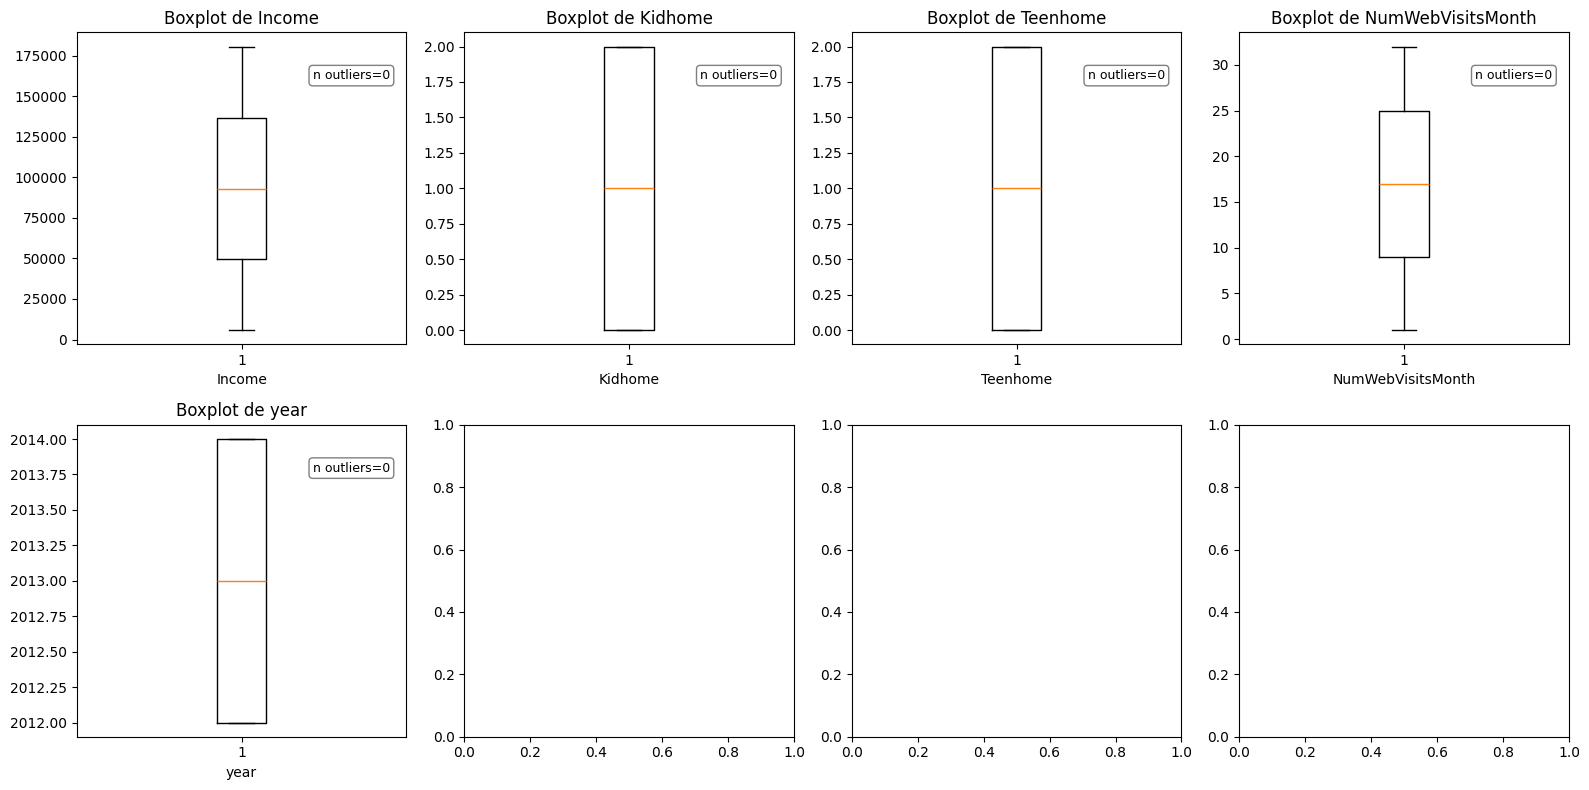

In [7]:
columna_numericas = df_customers.select_dtypes(include=['float64', 'Int64']).columns.tolist()
du.listar_outliers_y_boxplot(df_customers, columna_numericas)

### Almacenamiento de los datos limpios

In [8]:
# Grabamos el resultado en un archivo .PLK con los datos limpios

# Definimos la ruta y nombre del archivo de salida
current_dir = os.getcwd()
parent_dir = os.path.join(current_dir, '../Data')
output_path = os.path.join(parent_dir, 'customer_details_limpio.plk')
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Guardar el archivo limpio en pickle para mantener los typos de datos
df_customers.to_pickle(output_path)
